In [2]:
#Bibliothèques à importer
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [3]:
stemmedjobs = open('stemmed_lignes.txt').read().split('\n')
titles = open('titles.txt').read().split('\n')

print(str(len(stemmedjobs)) + ' synopses')
print(str(len(titles)) + ' titles')

2555 synopses
2555 titles


In [4]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [5]:
totalvocab_tokenized = []
for i in stemmedjobs:
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [6]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized})


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                 use_idf=True, tokenizer=tokenize_only)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(stemmedjobs)

print(tfidf_matrix.shape)

terms = tfidf_vectorizer.get_feature_names()

Wall time: 299 ms
(2555, 1282)


In [8]:

terms = tfidf_vectorizer.get_feature_names()

#print(terms)

In [9]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
num_clusters = 400
km = KMeans(n_clusters=num_clusters,init='k-means++',)
%time km.fit(tfidf_matrix)
model = km.fit(tfidf_matrix)
sum_of_squared_distances.append(km.inertia_)
print(sum_of_squared_distances)
#model
#Generate cluster predictions and store in y_hat
clusters = km.labels_.tolist()

Wall time: 6.2 s
[1046.780919277144]


In [14]:
import pandas as pd
jobs = {'title': titles,'synopsis': stemmedjobs, 'cluster': clusters}
frame = pd.DataFrame(jobs, index = [clusters] , columns = ['title','cluster','suggested'])

In [15]:
frame['cluster'].value_counts()

253    46
5      39
136    30
92     29
188    26
       ..
187     1
311     1
246     1
234     1
223     1
Name: cluster, Length: 400, dtype: int64

In [16]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [26]:
#Fonction qui permet de définir les tops titles des clusters pour donner une idée sur les catégories des jobs : 
from __future__ import print_function
from collections import Counter
import pandas as pd

#df = pd.DataFrame(columns=['titre','num_clusters','suggested'])
#df1 = pd.DataFrame(columns=['titree','num_clusters','suggested'])
for i in range(num_clusters):
    print() #add whitespace
    valeur = print("Cluster %d TITRES:" % i)
    titlejdid1 = []
    df['num_clusters'] = i
    var = frame.loc[i]['title']
    #print(var)
    for j in var:
        titlejdid = j.split(' ')
        #df.loc[title] = [titlejdid]
        titlejdid1 = titlejdid1 + titlejdid
    print()
    #partie counter + suggestion
    file = (Counter(titlejdid1).most_common(3))
    #print(file)
    print("Suggested Name of the cluster : ")
    if (len(file) == 3):
        trois = (file[0][0]+" "+file[1][0]+" "+file[2][0])
        frame['suggested'][i] = trois
    else:
        deux = (file[0][0]+" "+file[1][0])
        frame['suggested'][i] = deux
    print()




Cluster 0 TITRES:

Suggested Name of the cluster : 


Cluster 1 TITRES:

Suggested Name of the cluster : 


Cluster 2 TITRES:

Suggested Name of the cluster : 


Cluster 3 TITRES:

Suggested Name of the cluster : 


Cluster 4 TITRES:

Suggested Name of the cluster : 


Cluster 5 TITRES:

Suggested Name of the cluster : 


Cluster 6 TITRES:

Suggested Name of the cluster : 


Cluster 7 TITRES:

Suggested Name of the cluster : 


Cluster 8 TITRES:

Suggested Name of the cluster : 


Cluster 9 TITRES:

Suggested Name of the cluster : 


Cluster 10 TITRES:

Suggested Name of the cluster : 


Cluster 11 TITRES:

Suggested Name of the cluster : 


Cluster 12 TITRES:

Suggested Name of the cluster : 


Cluster 13 TITRES:

Suggested Name of the cluster : 


Cluster 14 TITRES:

Suggested Name of the cluster : 


Cluster 15 TITRES:

Suggested Name of the cluster : 


Cluster 16 TITRES:

Suggested Name of the cluster : 


Cluster 17 TITRES:

Suggested Name of the cluster : 


Cluster 18 TITRES:


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Suggested Name of the cluster : 


Cluster 106 TITRES:

Suggested Name of the cluster : 


Cluster 107 TITRES:

Suggested Name of the cluster : 


Cluster 108 TITRES:

Suggested Name of the cluster : 


Cluster 109 TITRES:

Suggested Name of the cluster : 


Cluster 110 TITRES:

Suggested Name of the cluster : 


Cluster 111 TITRES:

Suggested Name of the cluster : 


Cluster 112 TITRES:

Suggested Name of the cluster : 


Cluster 113 TITRES:

Suggested Name of the cluster : 


Cluster 114 TITRES:

Suggested Name of the cluster : 


Cluster 115 TITRES:

Suggested Name of the cluster : 


Cluster 116 TITRES:

Suggested Name of the cluster : 


Cluster 117 TITRES:

Suggested Name of the cluster : 


Cluster 118 TITRES:

Suggested Name of the cluster : 


Cluster 119 TITRES:

Suggested Name of the cluster : 


Cluster 120 TITRES:

Suggested Name of the cluster : 


Cluster 121 TITRES:

Suggested Name of the cluster : 


Cluster 122 TITRES:

Suggested Name of the cluster : 


Cluster 123 T

In [27]:
print(frame)
#frame.to_csv("fichier_final.csv")

                    title  cluster             suggested
24     account executive        24      account  manager
24     account executive        24      account  manager
24        account manager       24      account  manager
24       account manager        24      account  manager
24       account manager        24      account  manager
..                    ...      ...                   ...
97     web content editor       97      web developpeur 
97            webmarketer       97      web developpeur 
142            webmaster       142  webmaster  freelance
142  webmaster freelance       142  webmaster  freelance
142            webmaster       142  webmaster  freelance

[2555 rows x 3 columns]


ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

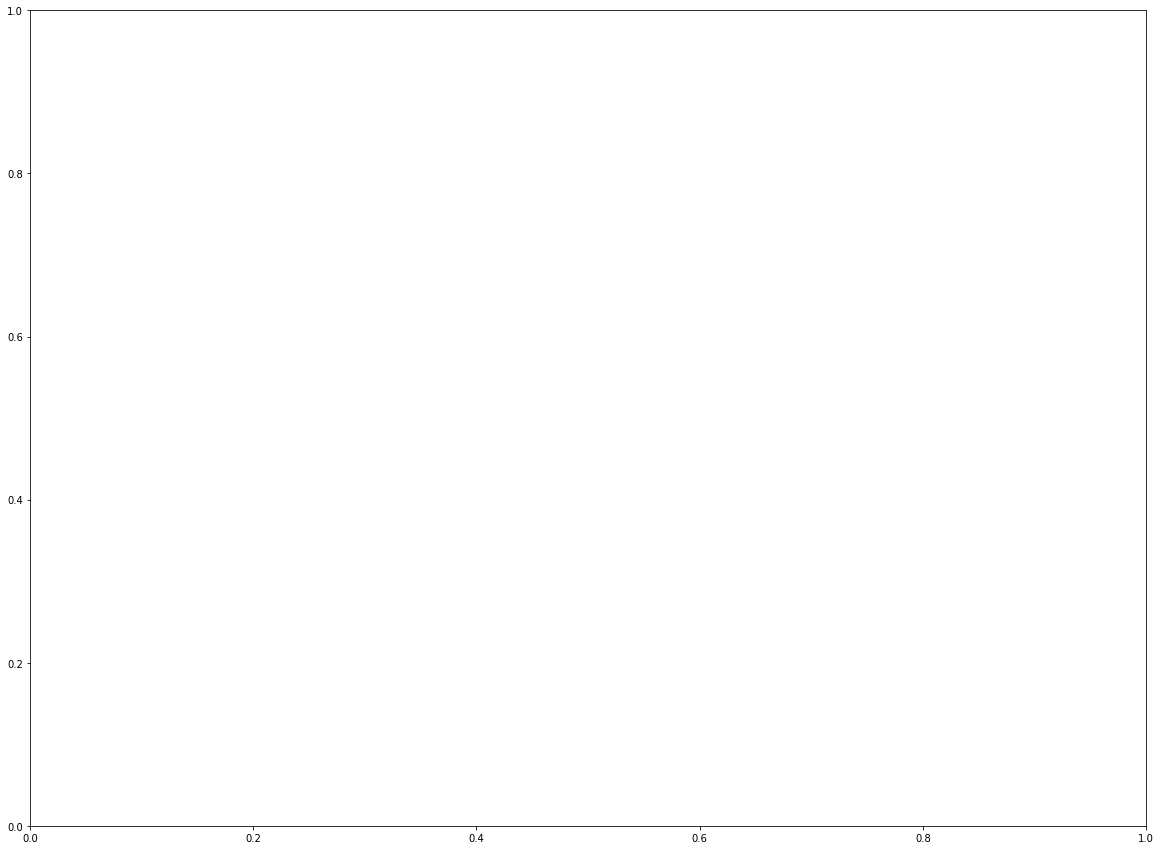

In [432]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
K = range(1,10)
plt.figure(figsize=(20,15))
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(tfidf_matrix)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()